# Python intermediate


Vítej ve cvičebním notebooku modulu Python intermediate! Postupně tě interaktivně provede probíranými tématy a poodkryje další zákoutí jazyka Python :) 

In [1]:
import os
import random
from pathlib import Path

%load_ext autoreload
%autoreload 2

In [2]:
# Kod z OOP (uz jsme udelali)
from abc import ABC, abstractmethod
import math

# create abstract class GeomObject with abstract method volume and surface
class GeomObject(ABC):
    def __init__(self, color: str, obj_type: str = ""):
        self.color = color
        self.obj_type = obj_type

    def __str__(self):
        return f"This is a {self.color} {self.obj_type}"

    @abstractmethod
    def volume(self):
        pass

    @abstractmethod
    def surface(self):
        pass

# create class Cuboid which inherits from GeomObject
class Cuboid(GeomObject):
    def __init__(self, color: str, a: float, b: float, c: float):
        super().__init__(color, "cuboid")
        self.a = a
        self.b = b
        self.c = c

    def volume(self):
        return self.a * self.b * self.c

    def surface(self):
        return 2 * (self.a * self.b + self.a * self.c + self.b * self.c)

# create class Sphere which inherits from GeomObject
class Sphere(GeomObject):
    def __init__(self, color: str, r: float):
        super().__init__(color, "sphere")
        self.r = r

    def volume(self):
        return 4/3 * math.pi * self.r ** 3

    def surface(self):
        return 4 * math.pi * self.r ** 2

# create class Cube which inherits from Cuboid
class Cube(Cuboid):
    def __init__(self, color: str, a: float):
        super().__init__(color, a, a, a)
        self.obj_type = "cube"

-------------------------------------------------------------------------

## Hluboká kopie

V jazyce Python existují dvě možnosti kopírování: *mělké* a *hluboké*. Mělká kopie kopíruje objekt, ale ne jeho prvky, hluboká kopie naproti tomu rekurzivně kopíruje objekt a všechny jeho prvky, které ukládá na **jiné** místo v paměti, takže v paměti máme oba objekty včetně všech prvků uloženy na dvou různých místech.

Datové typy dělíme na dva druhy - *mutable* a *immutable* (modifikovatelný,  nemodifikovatelný)

- **mutable** - kopíruje se referencí (`list`, `dict`, `set`)
- **immutable** - kopíruje se hodnotou (`int`, `float`, `str`, `tuple`) -  po vytvoření nemůžou být změněny

In [5]:
from copy import deepcopy

cuboid_1 = Cuboid("red", 3, 4, 5)
alist = [1, cuboid_1, "Ahoj!"]

shallow_copy_of_list = list(alist)
deep_copy_of_list = deepcopy(alist)

alist[0] = 1000000   # Změníme hodnotu seznamu
alist[1].a = 9999  # Změníme hodnotu strany obdélníku
alist[2] = "Nazdar.."   # Změníme hodnotu seznamu

print(f"Původní seznam: {alist}")
print(f"Mělká kopie seznamu: {shallow_copy_of_list}")
print(f"Hluboká kopie seznamu: {deep_copy_of_list}")

Původní seznam: [1000000, <__main__.Cuboid object at 0x76c828d9bf90>, 'Nazdar..']
Mělká kopie seznamu: [1, <__main__.Cuboid object at 0x76c828d9bf90>, 'Ahoj!']
Hluboká kopie seznamu: [1, <__main__.Cuboid object at 0x76c828da3c90>, 'Ahoj!']


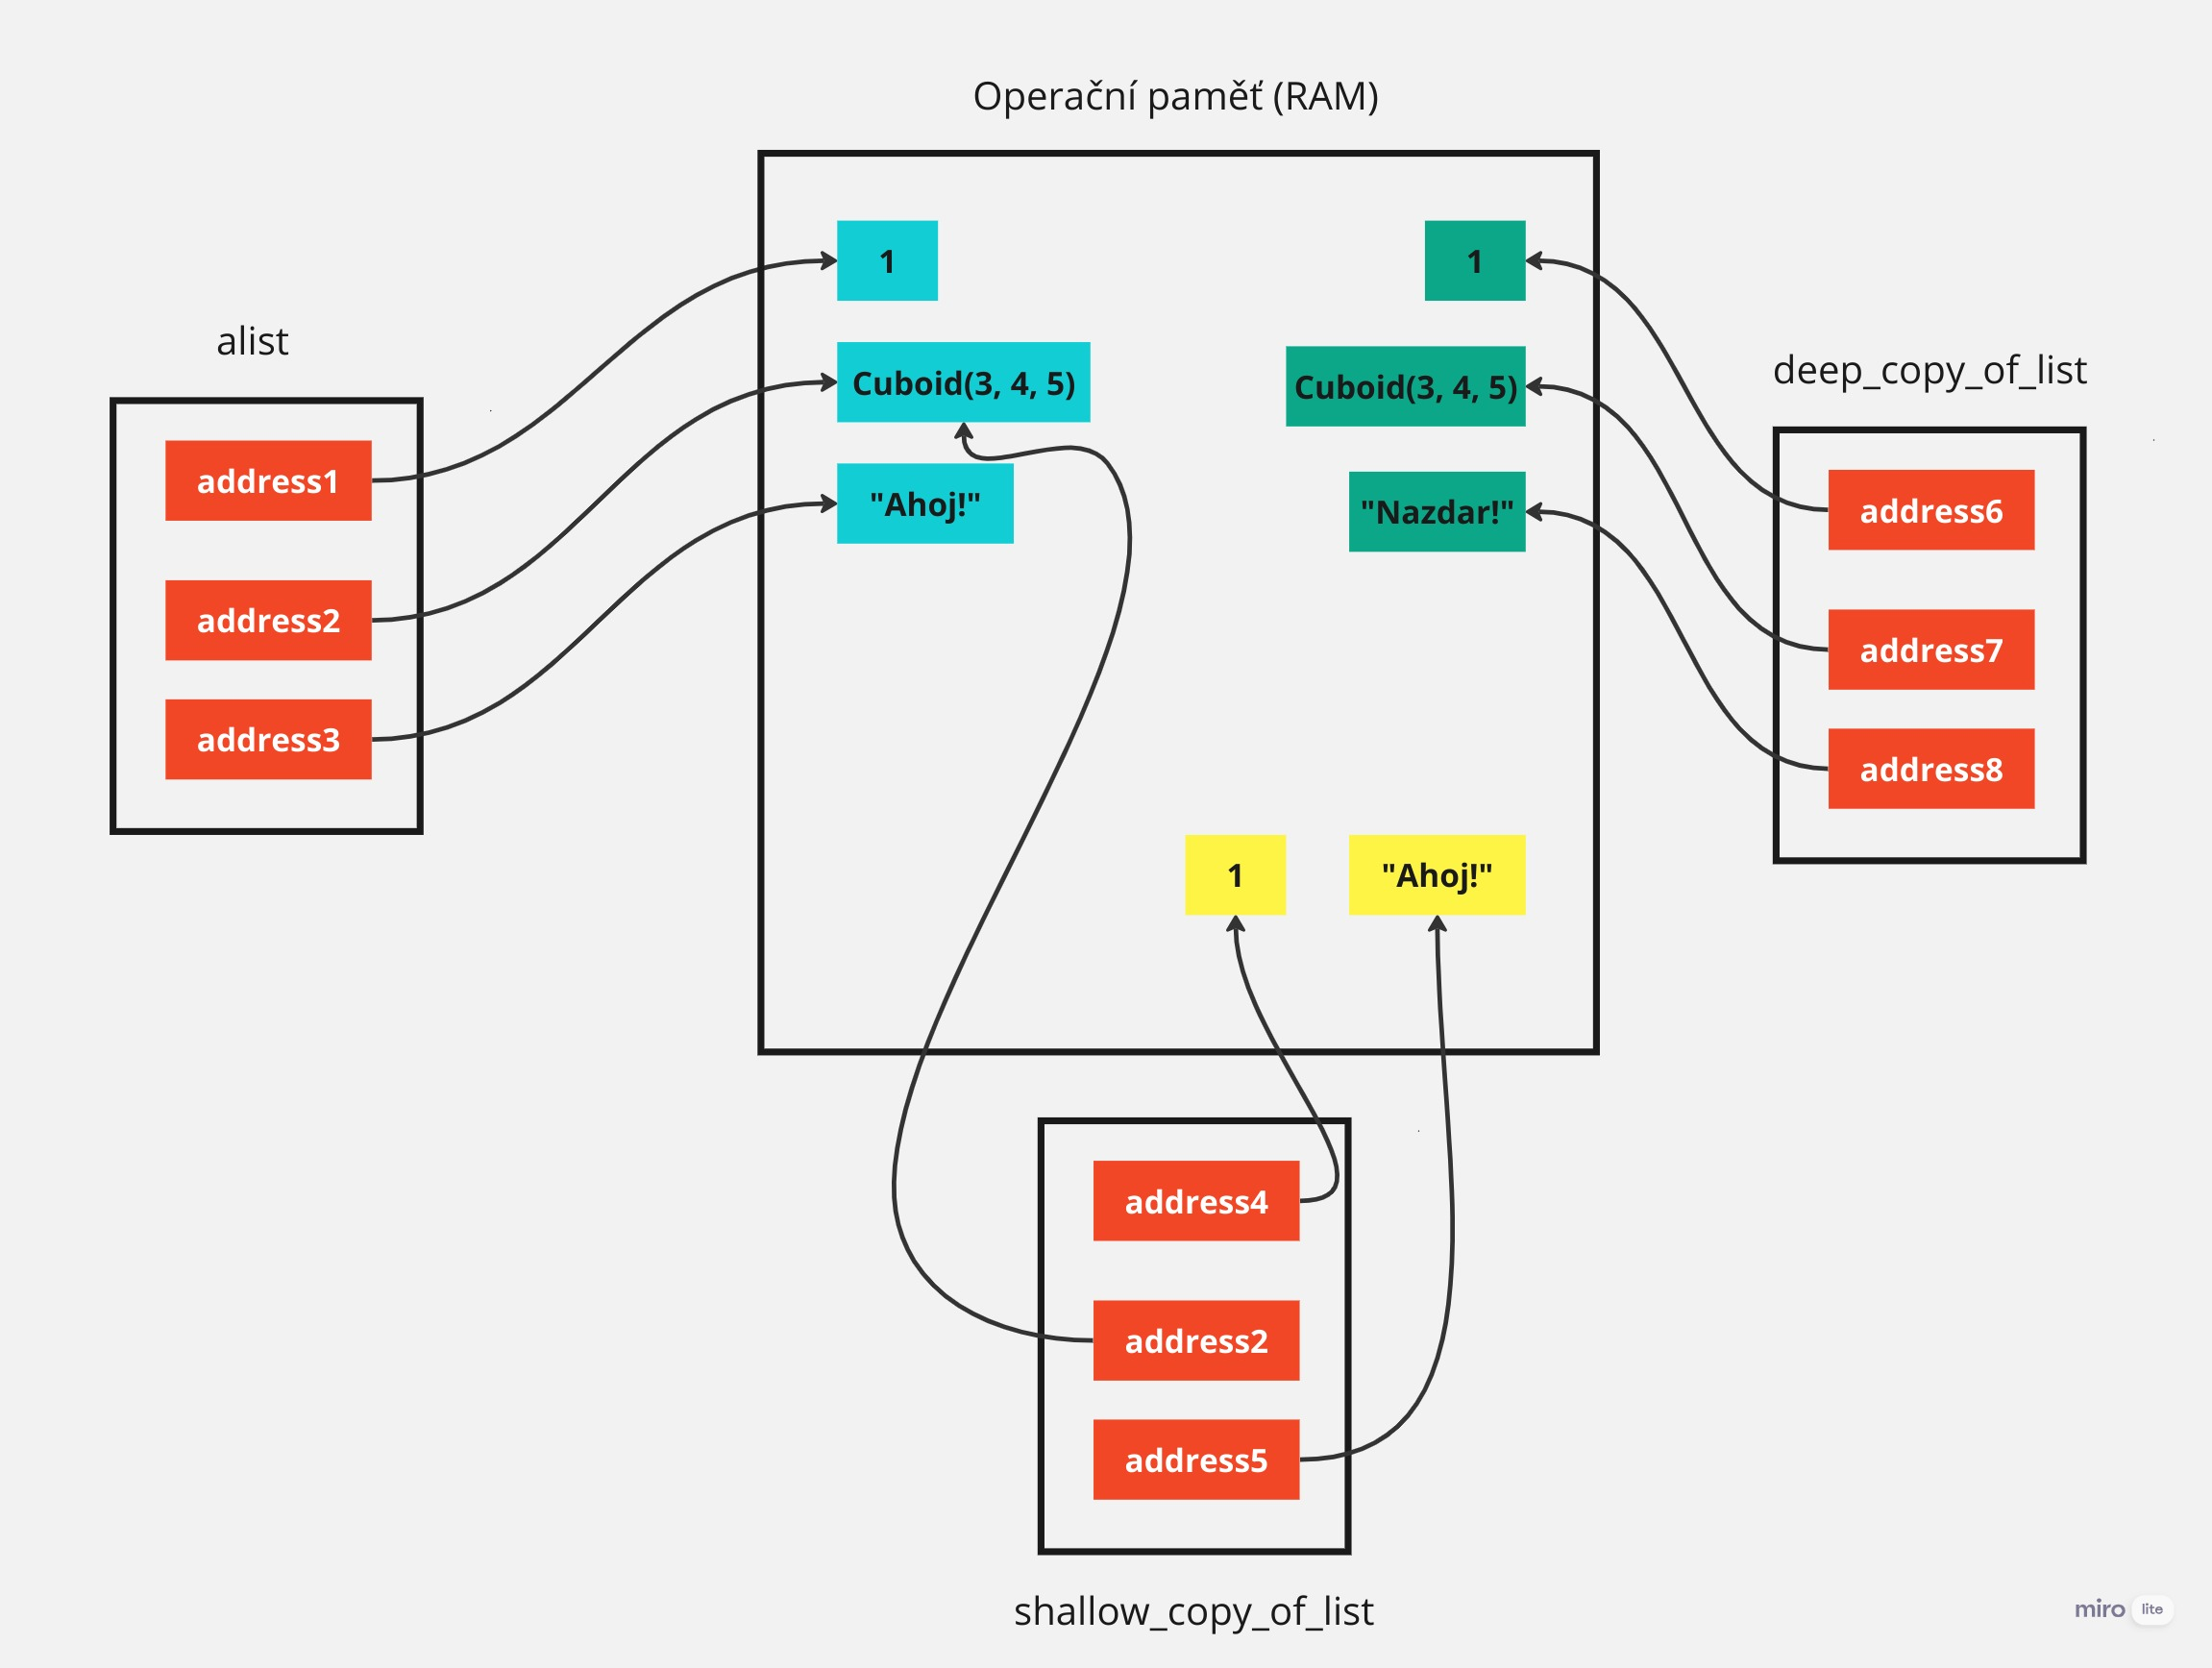